'''
Breast cancer (BC) is one of the most common cancers among women worldwide, \
representing the majority of new cancer cases and cancer-related deaths according to global statistics,
making it a significant public health problem in today’s society.

The early diagnosis of BC can improve the prognosis and chance of survival significantly, 
as it can promote timely clinical treatment to patients. 
Further accurate classification of benign tumors can prevent patients undergoing unnecessary treatments. 
Thus, the correct diagnosis of BC and classification of patients into malignant or benign groups is the
subject of much research. Because of its unique advantages in critical features detection from complex BC datasets,
machine learning (ML) is widely recognized as the methodology of choice in BC pattern classification and forecast modelling.

Classification and data mining methods are an effective way to classify data. 
Especially in medical field, where those methods are widely used in diagnosis and analysis to make decisions.

*****************************************************************************************************************************

Attribute Information:

--->>>  Diagnosis (M = malignant, B = benign)


Ten real-valued features are computed for each cell nucleus:

-->radius (mean of distances from center to points on the perimeter)
-->texture (standard deviation of gray-scale values)
-->perimeter
-->area
-->smoothness (local variation in radius lengths)
-->compactness (perimeter² / area — 1.0)
-->concavity (severity of concave portions of the contour)
-->concave points (number of concave portions of the contour)
-->symmetry
-->fractal dimension (“coastline approximation” — 1)

The mean, standard error and “worst” or largest (mean of the three largest values) of these features 
were computed for each image, resulting in 30 features. 

'''

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#importing our cancer dataset
df = pd.read_csv('data.csv')

In [2]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop("Unnamed: 32",axis=1,inplace=True)
df.drop("id",axis=1,inplace=True)

In [4]:
#Malignant(M) --- 1 (Cancerous)
#Benign(B) --- 0 (Not Cancerous)
df["diagnosis"].replace(to_replace="M",value=1,inplace=True)
df["diagnosis"].replace(to_replace="B",value=0,inplace=True)

In [5]:
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


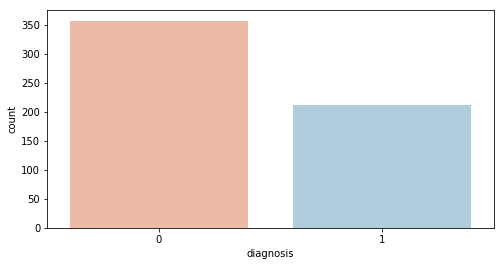

In [6]:
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(df['diagnosis'], palette='RdBu')


benign, malignant = df['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('% of cells labeled Benign', round(benign / len(df) * 100, 2), '%')
print('% of cells labeled Malignant', round(malignant / len(df) * 100, 2), '%')

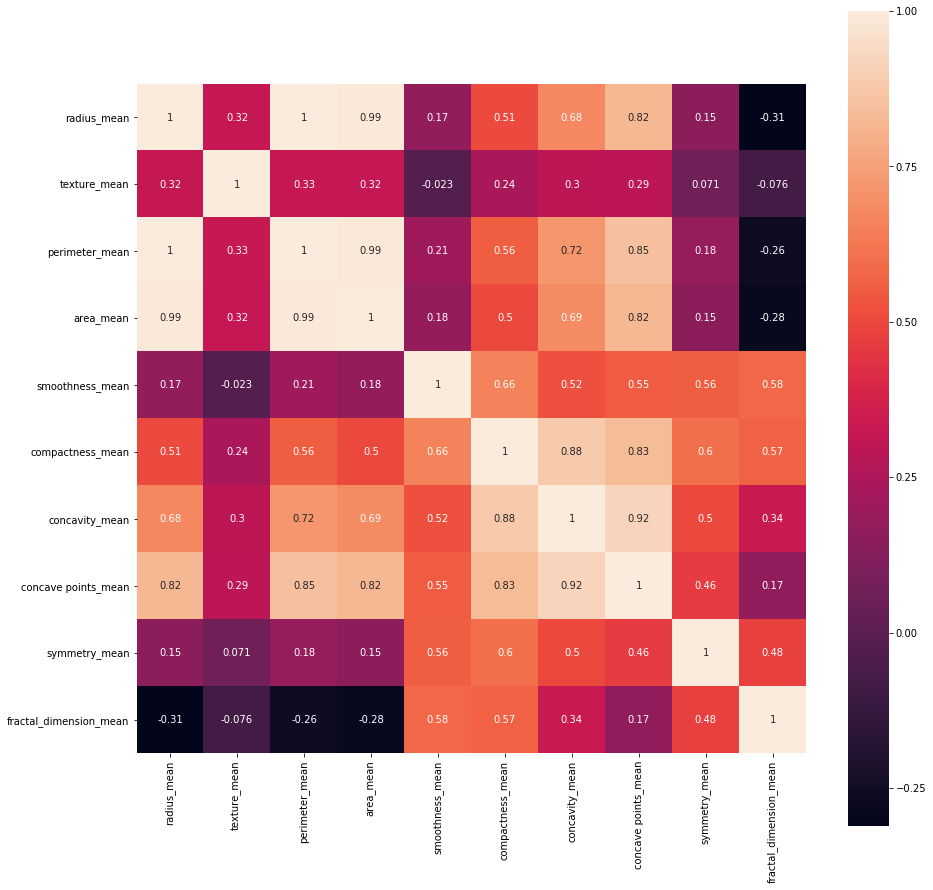

In [9]:
#draw a heatmap between mean features and diagnosis
features_mean = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
plt.figure(figsize=(15,15))
heat = sns.heatmap(df[features_mean].corr(), vmax=1, square=True, annot=True)

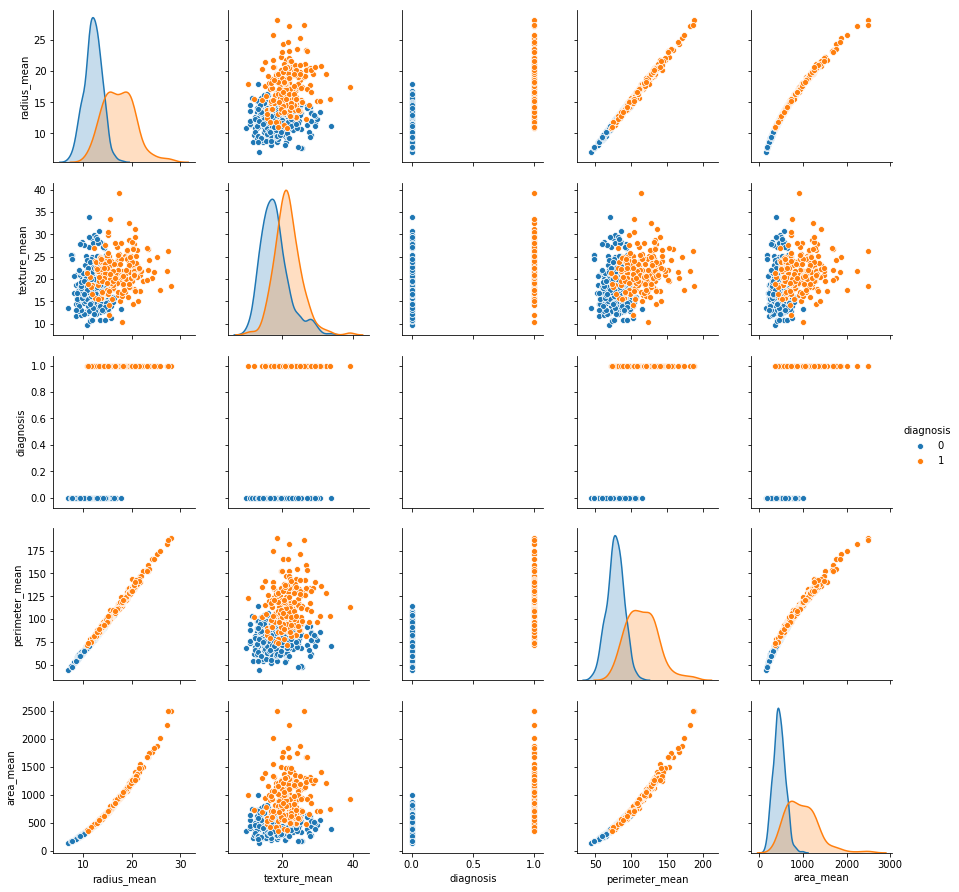

In [10]:
#pairplot data
d = df[['radius_mean','texture_mean','diagnosis','perimeter_mean','area_mean']]
h=sns.pairplot(d, hue='diagnosis')

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X=np.array(df.drop("diagnosis",axis=1))
Y=df["diagnosis"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [12]:
#Feature Scaling. [[To bring all features to the same level of magnitudes]]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, Y_train)

#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier2.fit(X_train, Y_train)

#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear', random_state = 0)
classifier3.fit(X_train, Y_train)

#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'rbf', random_state = 0)
classifier4.fit(X_train, Y_train)

#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train, Y_train)

#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier6.fit(X_train, Y_train)

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
classifier7 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier7.fit(X_train, Y_train)

c:\users\sahil\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [14]:
#COMPARING MODELS
print("USING Logistic Regression, ACCURACY(in %) : ",classifier1.score(X_test, Y_test)*100)
print("USING KNN Method, ACCURACY(in %) : ",classifier2.score(X_test, Y_test)*100)
print("USING Support Vector Machine Algorithm, ACCURACY(in %) : ",classifier3.score(X_test, Y_test)*100)
print("USING Kernel SVM Algorithm, ACCURACY(in %) : ",classifier4.score(X_test, Y_test)*100)
print("USING Naïve Bayes Algorithm, ACCURACY(in %) : ",classifier5.score(X_test, Y_test)*100)
print("USING Decision Tree Algorithm, ACCURACY(in %) : ",classifier6.score(X_test, Y_test)*100)
print("USING Random Forest Classification algorithm, ACCURACY(in %) : ",classifier7.score(X_test, Y_test)*100)
c1=classifier1.score(X_test, Y_test)*100
c2=classifier2.score(X_test, Y_test)*100
c3=classifier3.score(X_test, Y_test)*100
c4=classifier4.score(X_test, Y_test)*100
c5=classifier5.score(X_test, Y_test)*100
c6=classifier6.score(X_test, Y_test)*100
c7=classifier7.score(X_test, Y_test)*100

USING Logistic Regression, ACCURACY(in %) :  96.49122807017544
USING KNN Method, ACCURACY(in %) :  95.6140350877193
USING Support Vector Machine Algorithm, ACCURACY(in %) :  98.24561403508771
USING Kernel SVM Algorithm, ACCURACY(in %) :  98.24561403508771
USING Naïve Bayes Algorithm, ACCURACY(in %) :  90.35087719298247
USING Decision Tree Algorithm, ACCURACY(in %) :  92.98245614035088
USING Random Forest Classification algorithm, ACCURACY(in %) :  97.36842105263158


In [15]:
accmax=max(c1,c2,c3,c4,c5,c6,c7)
accmax

98.24561403508771